# Imports

In [1]:
import iris.analysis.stats as stats
import pandas as pd
import seaborn as sns
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import numpy as np
import warnings
from glob import glob
import warnings
from iris import load, Constraint 
import iris

In [2]:
warnings.filterwarnings("ignore")


# Calculate Pearson r Coefficients (Spatial correlation)
###  Load Reanalysis spatial patterns for PDV (MON), AMV (MON), PNA (DJF), PSA (ANN)
#### - Use as reference for correlations

In [ ]:
cvdpfile_obs_1='path_to_data/CMIP6_Historical_1900-2014.cvdp_data/ERSST_v5.cvdp_data.1900-2014.nc'
cvdpfile_obs_2='path_to_data/CMIP6_Historical_1900-2014.cvdp_data/ERA20C_ERA5.cvdp_data.1900-2014.nc'


## CVDP_LE diagnostic results include spatial patterns for the modes
var_name_list=['pna_pattern_djf','psa1_pattern_ann',\
                'pdv_pattern_mon','amv_pattern_mon']#,'amv_pattern_lowpass_mon']

### load spatial patterns of PNA, PSA1, PDV, AMV
obs_cube_dict={}

for i, cube_name in enumerate(var_name_list[:]):
    constraint=Constraint(cube_func=(lambda c: c.var_name == cube_name))
    if i < 2:
        obs_cube_dict[cube_name]=iris.load(cvdpfile_obs_2,constraint)[0]
    else:   
        obs_cube_dict[cube_name]=iris.load(cvdpfile_obs_1,constraint)[0]
    #print(obs_cube_dict[cube_name].shape)    

### Load CMIP6 LE spatial patterns
#### - Regrid to same grid (nearest)
#### - Calculate Pearson R coefficients 
#### - Store in dictionary

In [4]:
r_dict={} 
model_list=['ACCESS-ESM1-5_r','CESM2_r','CNRM-ESM2-1_r','CanESM5_r', 'EC-Earth3_r','GISS-E2-1-H_r','INM-CM5-0_r','IPSL-CM6A-LR_r','MIROC6_r','MPI-ESM1-2-LR_r','NorCPM1_r','UKESM1-0-LL_r']
for model in model_list[:]:
    cvdp_file_list=glob('path_to_data/CMIP6_Historical_1900-2014.cvdp_data/'+model+'*.nc')
    r_dict[model]={}
    for cvdpfile in cvdp_file_list[:]:

        modelname=cvdpfile.split('/')[-1].split('.')[0]
        #print(modelname) 
        LE=modelname.split('_')[0]
        ensm=modelname.split('_')[1]
        print(LE, ensm)
        r_dict[model][ensm]={}
        
        cube_dict={}

        for cube_name in var_name_list:
            if ensm == 'EM':
                constraint=Constraint(cube_func=(lambda c: c.var_name == cube_name+'_em'))
            else:
                constraint=Constraint(cube_func=(lambda c: c.var_name == cube_name))
            cube_dict[cube_name]=iris.load(cvdpfile,constraint)[0]
            #print(cube_dict[cube_name].shape)        
        
        for index in cube_dict.keys():
            regridded_obs=obs_cube_dict[index].regrid(cube_dict[index], iris.analysis.Nearest()) #regrid smaller grid (OBS)
            pc=stats.pearsonr(regridded_obs, cube_dict[index]) # iris anaylsis pearson r
            r_dict[model][ensm][index]=float(pc.data)
            #print(pc.data)

ACCESS-ESM1-5 r5i1p1f1
ACCESS-ESM1-5 r1i1p1f1
ACCESS-ESM1-5 r9i1p1f1
ACCESS-ESM1-5 r2i1p1f1
ACCESS-ESM1-5 r8i1p1f1
ACCESS-ESM1-5 r7i1p1f1
ACCESS-ESM1-5 r10i1p1f1
ACCESS-ESM1-5 r4i1p1f1
ACCESS-ESM1-5 r3i1p1f1
ACCESS-ESM1-5 r6i1p1f1
CESM2 r1i1p1f1
CESM2 r8i1p1f1
CESM2 r2i1p1f1
CESM2 r6i1p1f1
CESM2 r10i1p1f1
CESM2 r11i1p1f1
CESM2 r7i1p1f1
CESM2 r3i1p1f1
CESM2 r5i1p1f1
CESM2 r9i1p1f1
CESM2 r4i1p1f1
CNRM-ESM2-1 r11i1p1f2
CNRM-ESM2-1 r4i1p1f2
CNRM-ESM2-1 r1i1p1f2
CNRM-ESM2-1 r5i1p1f2
CNRM-ESM2-1 r7i1p1f2
CNRM-ESM2-1 r9i1p1f2
CNRM-ESM2-1 r10i1p1f2
CNRM-ESM2-1 r3i1p1f2
CNRM-ESM2-1 r8i1p1f2
CNRM-ESM2-1 r2i1p1f2
CanESM5 r15i1p1f1
CanESM5 r11i1p1f1
CanESM5 r1i1p2f1
CanESM5 r19i1p2f1
CanESM5 r26i1p2f1
CanESM5 r33i1p2f1
CanESM5 r31i1p2f1
CanESM5 r13i1p2f1
CanESM5 r29i1p2f1
CanESM5 r22i1p2f1
CanESM5 r23i1p1f1
CanESM5 r6i1p1f1
CanESM5 r2i1p2f1
CanESM5 r38i1p2f1
CanESM5 r19i1p1f1
CanESM5 r37i1p2f1
CanESM5 r24i1p1f1
CanESM5 r4i1p1f1
CanESM5 r25i1p1f1
CanESM5 r22i1p1f1
CanESM5 r12i1p1f1
CanESM5 r23i1p2f

# Calculate spatial correlation Mean Score
#### Tranform to dataframe (pandas)

In [5]:
            
daf=pd.DataFrame.from_dict({(i,j): r_dict[i][j] 
                           for i in r_dict.keys()
                           for j in r_dict[i].keys()},
                       orient='index')

daf.sort_index(inplace=True)

daf.index.set_names(['CMIP6_LE', 'ensemble_member'], inplace=True)
daf

daf.to_csv('Results_DIR/pattern_corr_cmip6_ersstv5_era20c_era5.csv')

In [6]:
daf.reset_index( inplace=True)


#### Remove Ensemble Mean

In [7]:
dfnoEM = daf[daf.ensemble_member != 'EM']

## Calculate Mean Score
#### Apply Fisher Z transform
#### Average 
#### Back transform

In [8]:
dfnoEM.set_index(['CMIP6_LE', 'ensemble_member'], inplace=True)

## Mean score of Pearson correlation values
## Fisher z-transform, average z, back-transform 
mind=np.tanh(np.arctanh(dfnoEM).mean(axis=1))

mind=mind.to_frame()
mind.columns=['mean_score']
withmean = dfnoEM.copy()
## Arrange single pattern correlation coffecients and the mean_score 
## in one dataframe
withmean['mean_score'] = mind[['mean_score']].copy()


#### melt dataframe

In [9]:
withmean=withmean.reset_index()
# melt the dataframe for whisker plot
melted=pd.melt(withmean, id_vars=["CMIP6_LE","ensemble_member"],
        var_name="CV_pattern", 
        value_name="r_coeff")

## Create Boxplot

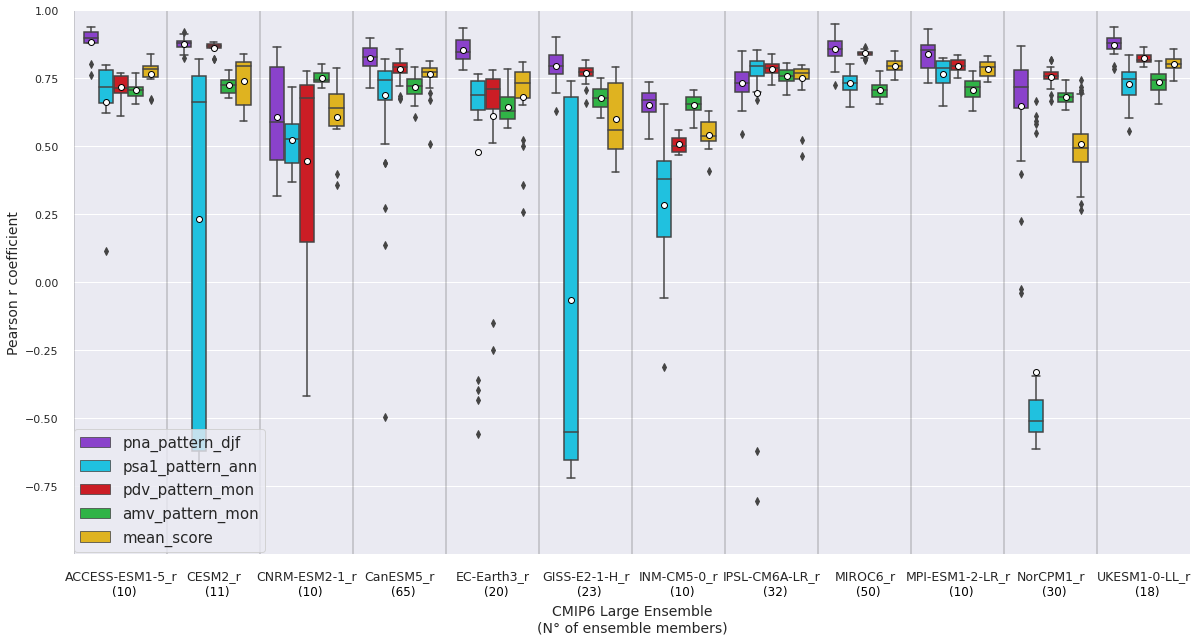

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set_theme(style="darkgrid", palette="bright")
sns.color_palette("Set3", 10)
counts=melted.groupby(['CMIP6_LE']).count()/5


g=sns.boxplot(x="CMIP6_LE", y="r_coeff",
            hue="CV_pattern", 
            data=melted, palette=["m", "c","r","g","y"], showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})
yticks=g.get_yticks()
for xtick in g.get_xticks():
    ax.axvline(x=xtick-0.5, color='black', linewidth=0.3)
    g.text(xtick+0.04,-1.15, '('+str(int(counts['ensemble_member'][xtick]))+')', horizontalalignment='center',size='medium',color='black',weight='regular')

#g.set(xlabel="Pearson r coefficient", ylabel="CMIP6 LE (number of ensemble members)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel("Pearson r coefficient",weight='normal',fontsize=14)
ax.set_xlabel(r"CMIP6 Large Ensemble""\n"r"(N° of ensemble members)",weight='normal',fontsize=14,labelpad=22)
sns.despine(offset=6, trim=True)
ax.set_ylim([-1, 1])
plt.xticks(fontsize=12.5, weight='regular')
#plt.grid(True)
plt.legend(bbox_to_anchor=(0., 0.23), loc=2, prop={'size': 15}, borderaxespad=0.)
plt.savefig("Results_DIR/boxplot_cmip6_pattern_spatial_correlations.png", dpi=300)
plt.show()